In [18]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

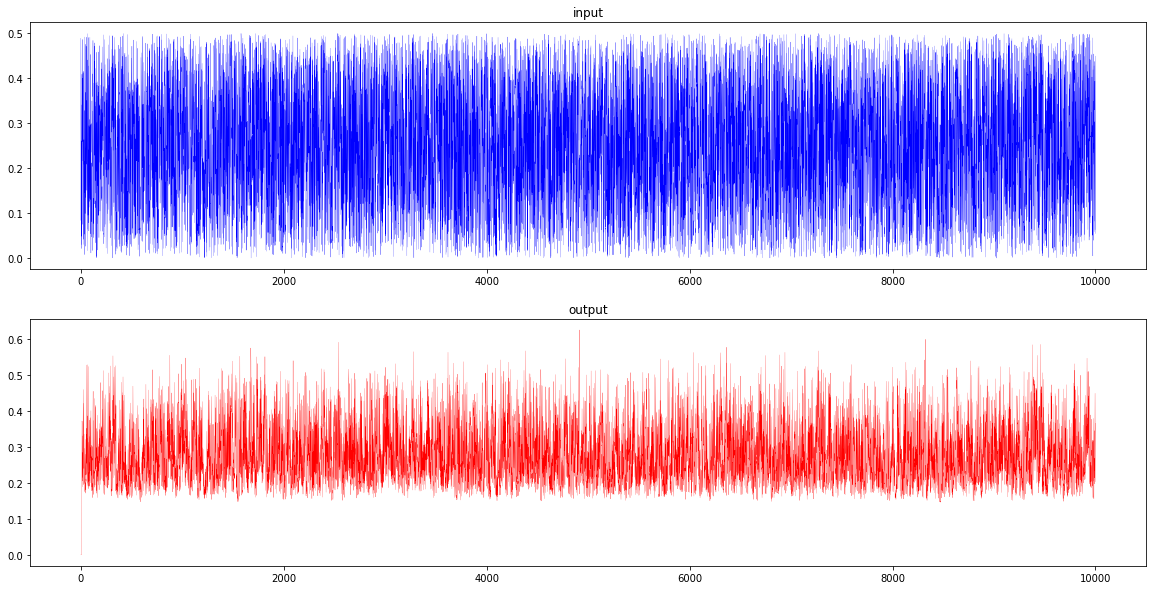

In [20]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000] #validation
x_test = x[5000:]

y_train = y[:4000]
y_valid = y[4000:5000]
y_test = y[5000:]

## TDNN

In [21]:
# Create a TDNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(units=20,input_shape=input_shape, activation='tanh'))
    #model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        #activation=activation[0]))
    model.add(Dense(units=30, activation='tanh'))
    model.add(Dense(units=1, activation='tanh'))
    learning_rate = 0.02
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [69]:
# Prepare the input X and target Y
def get_XY(x, y, time_steps):
    # Prepare Y
    Y = y[time_steps:]
    # Prepare X
    X = []
    rows_x = len(Y)
    j = 0
    for i in range(rows_x):
        X = np.append(X,x[j:j+time_steps])
        j = j + 1

    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 

time_steps = 10

trainX, trainY = get_XY(x_train, y_train, time_steps)
testX, testY = get_XY(x_test, y_test, time_steps)
validX, validY = get_XY(x_valid, y_valid, time_steps)

window = time_steps
input_shape = (window,1)

model = create_model(input_shape)
print(len(trainX))

model.summary()

3990
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10, 20)            40        
                                                                 
 dense_28 (Dense)            (None, 10, 30)            630       
                                                                 
 dense_29 (Dense)            (None, 10, 1)             31        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [22]:
'''
X = np.reshape(x, (len(x),1))
Y = np.reshape(y, (len(y),1))

X_train = np.reshape(x_train, (len(x_train),1))
Y_train = np.reshape(y_train, (len(y_train),1))

X_valid = np.reshape(x_valid, (len(x_valid),1))
Y_valid = np.reshape(y_valid, (len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

window = 10
input_shape = (window,1)

model = create_model(input_shape)


model.summary()
'''


(4000, 1)
(4000, 1)
(1000, 1)
(1000, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10, 20)            40        
                                                                 
 dense_10 (Dense)            (None, 10, 30)            630       
                                                                 
 dense_11 (Dense)            (None, 10, 1)             31        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(trainX, trainY, epochs=50, batch_size=len(trainX), verbose=2, validation_data = (validX, validY)).history

Epoch 1/50
1/1 - 1s - loss: 0.0086 - val_loss: 0.0086 - 961ms/epoch - 961ms/step
Epoch 2/50
1/1 - 1s - loss: 0.0085 - val_loss: 0.0086 - 808ms/epoch - 808ms/step
Epoch 3/50
1/1 - 1s - loss: 0.0084 - val_loss: 0.0085 - 797ms/epoch - 797ms/step
Epoch 4/50
1/1 - 1s - loss: 0.0084 - val_loss: 0.0085 - 763ms/epoch - 763ms/step
Epoch 5/50
1/1 - 1s - loss: 0.0083 - val_loss: 0.0084 - 786ms/epoch - 786ms/step
Epoch 6/50
1/1 - 1s - loss: 0.0083 - val_loss: 0.0084 - 821ms/epoch - 821ms/step
Epoch 7/50
1/1 - 1s - loss: 0.0082 - val_loss: 0.0084 - 859ms/epoch - 859ms/step
Epoch 8/50
1/1 - 1s - loss: 0.0082 - val_loss: 0.0083 - 809ms/epoch - 809ms/step
Epoch 9/50
1/1 - 1s - loss: 0.0082 - val_loss: 0.0083 - 760ms/epoch - 760ms/step
Epoch 10/50
1/1 - 1s - loss: 0.0081 - val_loss: 0.0083 - 787ms/epoch - 787ms/step
Epoch 11/50
1/1 - 1s - loss: 0.0081 - val_loss: 0.0083 - 773ms/epoch - 773ms/step
Epoch 12/50
1/1 - 1s - loss: 0.0081 - val_loss: 0.0083 - 801ms/epoch - 801ms/step
Epoch 13/50
1/1 - 1s - lo

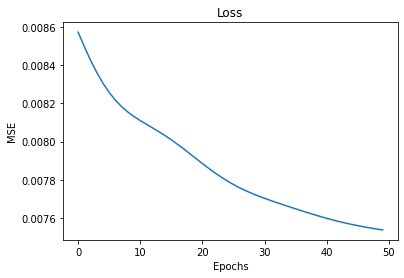

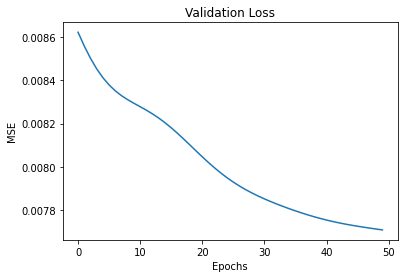

In [52]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

In [57]:
print(len(trainY))

print(trainX[1])

3990
[[0.48934032]
 [0.35634724]
 [0.25023581]
 [0.23554419]
 [0.02980943]
 [0.34098595]
 [0.02121557]
 [0.03572273]
 [0.26082492]
 [0.04836501]]


In [60]:
 
y = []
for i in range (len(trainY)):
    print(i)
    y = np.append(y,model.predict(trainX[i]))



'''
y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y, color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)
'''

0
1/1 [==============================] - 0s 127ms/step
1
1/1 [==============================] - 0s 22ms/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 30ms/step
4
1/1 [==============================] - 0s 19ms/step
5
1/1 [==============================] - 0s 24ms/step
6
1/1 [==============================] - 0s 20ms/step
7
1/1 [==============================] - 0s 21ms/step
8
1/1 [==============================] - 0s 23ms/step
9
1/1 [==============================] - 0s 20ms/step
10
1/1 [==============================] - 0s 23ms/step
11
1/1 [==============================] - 0s 50ms/step
12
1/1 [==============================] - 0s 28ms/step
13
1/1 [==============================] - 0s 25ms/step
14
1/1 [==============================] - 0s 24ms/step
15
1/1 [==============================] - 0s 24ms/step
16
1/1 [==============================] - 0s 19ms/step
17
1/1 [==============================] - 0s 18ms/step
18
1/1 [===========

"\nt=np.arange(start=0,stop=len(X_train[0]), step=1)\nplt.figure(figsize = (20,10))\nplt.plot(t,y, color = 'b', linewidth= 0.2)\nplt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)\nmodel.evaluate(X_train, Y_train)\n\n\ny = model.predict(X_valid)\nt=np.arange(start=0,stop=len(X_valid[0]), step=1)\nplt.figure(figsize = (20,10))\nplt.plot(t,y, color = 'b', linewidth= 0.3)\nplt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)\nmodel.evaluate(X_valid, Y_valid)\n"

In [75]:
print(model.predict([trainX]))

125/125 [==============================] - 0s 2ms/step
[[[-0.01432122]
  [-0.0797457 ]
  [-0.05934336]
  ...
  [-0.00362349]
  [-0.0061002 ]
  [-0.04394474]]

 [[-0.0797457 ]
  [-0.05934336]
  [-0.04220618]
  ...
  [-0.0061002 ]
  [-0.04394474]
  [-0.00825727]]

 [[-0.05934336]
  [-0.04220618]
  [-0.03978498]
  ...
  [-0.04394474]
  [-0.00825727]
  [-0.06759119]]

 ...

 [[-0.04826039]
  [-0.07505508]
  [-0.04179171]
  ...
  [-0.0057615 ]
  [-0.00588961]
  [-0.01422406]]

 [[-0.07505508]
  [-0.04179171]
  [-0.01415839]
  ...
  [-0.00588961]
  [-0.01422406]
  [-0.07742058]]

 [[-0.04179171]
  [-0.01415839]
  [-0.0276921 ]
  ...
  [-0.01422406]
  [-0.07742058]
  [-0.06704522]]]


In [65]:
print(y)
len(y)

[0.26866594 0.2921955  0.28533435 ... 0.26862743 0.29143393 0.28797203]


39900

ValueError: x and y must have same first dimension, but have shapes (39900,) and (3990,)

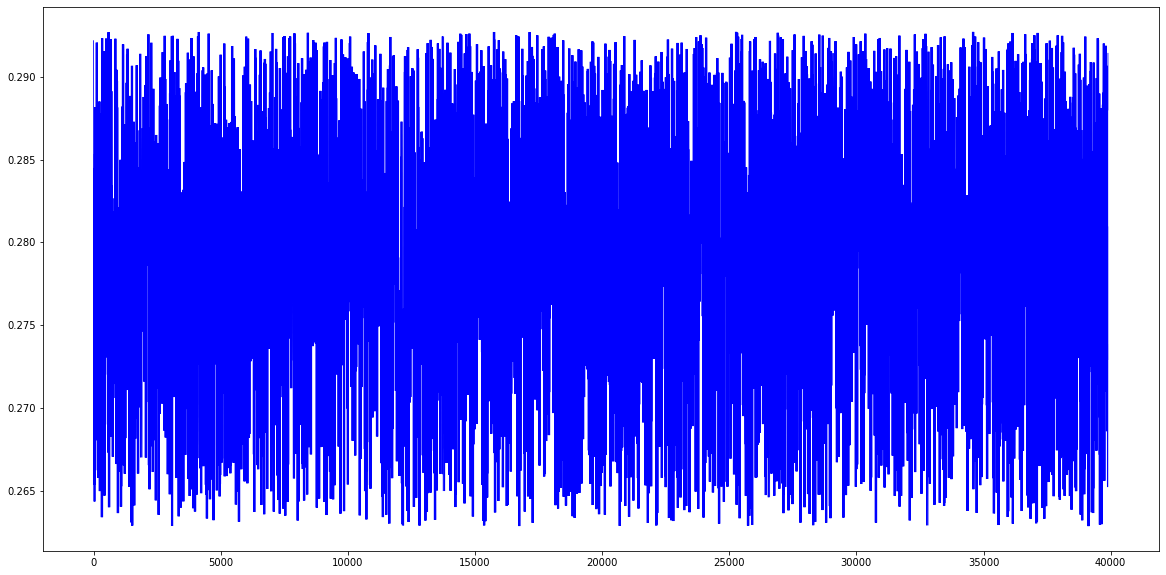

In [63]:
t=np.arange(start=0,stop=len(y), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y, color = 'b', linewidth= 0.2)
plt.plot(t,trainY, color = 'r', linewidth= 0.2)
